In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot 
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

# File to Load

spotify_data_load = Path("Resources/spotify_songs .csv")

# Read Data File and store into Pandas DataFrames
spotify_data= pd.read_csv(spotify_data_load)
spotify_data_drop = spotify_data.drop(columns =['track_id','track_album_id', 'playlist_id', 'track_album_name',
                                        'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence'])
# Show DateFrame
spotify_data_drop.head(20)

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,key,loudness,tempo,duration_ms
0,At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
1,(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
2,Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
3,At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
4,Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
5,Green Onions,Booker T. & the M.G.'s,64,1962,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,10,-8.741,136.837,176333
6,Christmas (Baby Please Come Home),Darlene Love,73,1963,Christmas Soul,r&b,neo soul,3,-7.146,126.322,166453
7,Winter Wonderland,Aretha Franklin,45,1964,Christmas Soul,r&b,neo soul,7,-8.026,106.274,132107
8,Turn! Turn! Turn! (To Everything There Is a Se...,The Byrds,42,1965,Classic Rock,rock,classic rock,2,-8.170,124.594,229533
9,Que Bueno Baila Usted,Beny Moré,40,1965,Cuban vibes only,r&b,urban contemporary,5,-9.712,172.230,196933


In [2]:
#Check 
spotify_data_drop.dtypes

track_name                   object
track_artist                 object
track_popularity              int64
track_album_release_date      int64
playlist_name                object
playlist_genre               object
playlist_subgenre            object
key                           int64
loudness                    float64
tempo                       float64
duration_ms                   int64
dtype: object

In [3]:
#Make it pretty 
spotify_df = spotify_data_drop.rename(columns={"track_name": "Track Name", "track_artist": "Artist", "track_popularity": "Popularity",
                          "track_album_release_date": "Release Date", "playlist_name": "Playlist Name",
                          "playlist_genre": "Genre", "playlist_subgenre": "Subgenre", "key": "Key",
                          "loudness": "Loudness","tempo": "Tempo", "duration_ms": "Duration (ms)"})
spotify_df = spotify_df.set_index(["Track Name"])

#Print data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107


In [4]:
#For Key Data : by key data person
#Define the number assignments of the key in letter form. 
#Create new column for the letter key
def key_assign(key):
    if key == 0:
        return("C")
    elif key == 1:
        return('C#')
    elif key == 2:
        return('D')
    elif key == 3:
        return('D#')
    elif key == 4:
        return('E')
    elif key == 5:
        return("F")
    elif key == 6:
        return('F#')
    elif key == 7:
        return('G')
    elif key == 8:
        return('G#')
    elif key == 9:
        return('A')
    elif key == 10:
        return('A#')
    elif key == 11:
        return('B')
    else:
        return('No Key Detected')

spotify_df["Key Assignment"] = spotify_df['Key'].apply(key_assign)

#Display new data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms),Key Assignment
Track Name,,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400,F
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507,B
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547,G
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893,F
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333,A#
...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333,D#
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987,C
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107,F#


In [5]:
#Categorize and Establish Bins for Popularity
size_bins = (-1, 30, 60, 90, 100)
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)'] 

spotify_df["Popularity Sectors"] = pd.cut(spotify_df["Popularity"],size_bins, labels=labels)

#Organize Columns
spotify_df =spotify_df.reindex(columns=['Artist', 'Popularity', 'Popularity Sectors', 'Release Date',
                                       'Playlist Name', 'Genre', 'Subgenre', 'Key', 'Key Assignment',
                                       'Loudness', 'Tempo', 'Duration (ms)'])

#Print data frame
spotify_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107


In [6]:
#Key Data

#Drop un-needed columns
key_df = spotify_df.drop(columns={'Release Date', 'Playlist Name', 'Genre',
                         'Subgenre', 'Loudness', 'Tempo', 'Duration (ms)'})

#Print data frame
key_df

,Artist,Popularity,Popularity Sectors,Key,Key Assignment
Track Name,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),5,F
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),11,B
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),7,G
At Last - Single Version,Etta James,15,Least Popular (<30),5,F
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),10,A#
...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),3,D#
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),0,C
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),6,F#


In [7]:
#Group and Count each letter in Key Assignment
key_group = key_df.groupby(['Key Assignment']).size()
key_group

Key Assignment
A     3027
A#    2273
B     2996
C     3454
C#    4010
D     2827
D#     913
E     2201
F     2680
F#    2670
G     3352
G#    2430
dtype: int64

In [8]:
#Group by Popularity Sectors and sort 
key_group_2 = key_df.groupby(['Popularity Sectors'])['Key Assignment'].value_counts()
key_group_2 =pd.DataFrame(key_group_2)
key_group_2 = key_group_2.sort_values('Key Assignment')

#Print data frame
key_group_2

count
Popularity Sectors          Key Assignment       
Mid to High Popular (60-89) A                 811
Least Popular (<30)         A                 904
Most Popular (90-100)       A                  19
Low to Mid Popular (30-59)  A                1293
                            A#                973
Mid to High Popular (60-89) A#                580
Most Popular (90-100)       A#                 38
Least Popular (<30)         A#                682
Mid to High Popular (60-89) B                 802
Low to Mid Popular (30-59)  B                1259
Least Popular (<30)         B                 913
Most Popular (90-100)       B                  22
Least Popular (<30)         C                1023
Mid to High Popular (60-89) C                 969
Low to Mid Popular (30-59)  C                1452
Most Popular (90-100)       C                  10
Least Popular (<30)         C#               1195
Low to Mid Popular (30-59)  C#               1696
Most Popular (90-100)       C#                 32
Mid to High Popular (60-89) C#               1087
                            D                 711
Most Popular (90-100)       D                  28
Least Popular (<30)         D                 905
Low to Mid Popular (30-59)  D                1183
Mid to High Popular (60-89) D#                224
Low to Mid Popular (30-59)  D#                404
Most Popular (90-100)       D#                  0
Least Popular (<30)         D#                285
                            E                 695
Most Popular (90-100)       E                   7
Mid to High Popular (60-89) E                 575
Low to Mid Popular (30-59)  E                 924
                            F                1133
Mid to High Popular (60-89) F                 724
Least Popular (<30)         F                 815
Most Popular (90-100)       F                   8
Mid to High Popular (60-89) F#                704
Most Popular (90-100)       F#                 33
Least Popular (<30)         F#                820
Low to Mid Popular (30-59)  F#               1113
                            G                1383
Mid to High Popular (60-89) G                 792
Least Popular (<30)         G                1133
Most Popular (90-100)       G                  44
Mid to High Popular (60-89) G#                711
Least Popular (<30)         G#                638
Low to Mid Popular (30-59)  G#               1070
Most Popular (90-100)       G#                 11

In [9]:
#Group by individual bin
key_group_5=key_group_2.loc['Least Popular (<30)']

#Calculate each key percentage of key in bin
key_group_5= (key_group_5['count']) / (key_group_5['count'].sum()) * 100

#print
key_group_5

Key Assignment
A      9.032774
A#     6.814548
B      9.122702
C     10.221823
C#    11.940448
D      9.042766
D#     2.847722
E      6.944444
F      8.143485
F#     8.193445
G     11.320943
G#     6.374900
Name: count, dtype: float64

In [10]:
#Grouop by individual bin
key_group_3=key_group_2.loc['Low to Mid Popular (30-59)']

#Calaculate each key percentage of key in bin
key_group_3= (key_group_3['count']) / (key_group_3['count'].sum()) * 100

#print
key_group_3


Key Assignment
A      9.313549
A#     7.008572
B      9.068645
C     10.458835
C#    12.216380
D      8.521213
D#     2.910034
E      6.655622
F      8.161060
F#     8.016999
G      9.961824
G#     7.707268
Name: count, dtype: float64

In [11]:
#Group by individual bin
key_group_4=key_group_2.loc['Mid to High Popular (60-89)']

#Calculate each key percentage of key in bin
key_group_4= (key_group_4['count']) / (key_group_4['count'].sum()) * 100

#print
key_group_4

Key Assignment
A      9.332566
A#     6.674338
B      9.228999
C     11.150748
C#    12.508631
D      8.181818
D#     2.577675
E      6.616801
F      8.331415
F#     8.101266
G      9.113924
G#     8.181818
Name: count, dtype: float64

In [12]:
#Group by individual bin
key_group_6=key_group_2.loc['Most Popular (90-100)']

#Calculate each key percentage of key in bin
key_group_6= (key_group_6['count']) / (key_group_6['count'].sum()) * 100

#print
key_group_6

Key Assignment
A      7.539683
A#    15.079365
B      8.730159
C      3.968254
C#    12.698413
D     11.111111
D#     0.000000
E      2.777778
F      3.174603
F#    13.095238
G     17.460317
G#     4.365079
Name: count, dtype: float64

In [13]:
#Create a data frame with each bin
key_popularity = pd.DataFrame({"Most Popular (90-100)": key_group_6,
                       "Mid to High Popular (60-89)": key_group_4,
                       "Low to Mid Popular (30-59)": key_group_3,
                       "Least Popular (<30)": key_group_5}) 

#Print
key_popularity

,Most Popular (90-100),Mid to High Popular (60-89),Low to Mid Popular (30-59),Least Popular (<30)
Key Assignment,,,,
A,7.539683,9.332566,9.313549,9.032774
A#,15.079365,6.674338,7.008572,6.814548
B,8.730159,9.228999,9.068645,9.122702
C,3.968254,11.150748,10.458835,10.221823
C#,12.698413,12.508631,12.216380,11.940448
D,11.111111,8.181818,8.521213,9.042766
D#,0.000000,2.577675,2.910034,2.847722
E,2.777778,6.616801,6.655622,6.944444
F,3.174603,8.331415,8.161060,8.143485


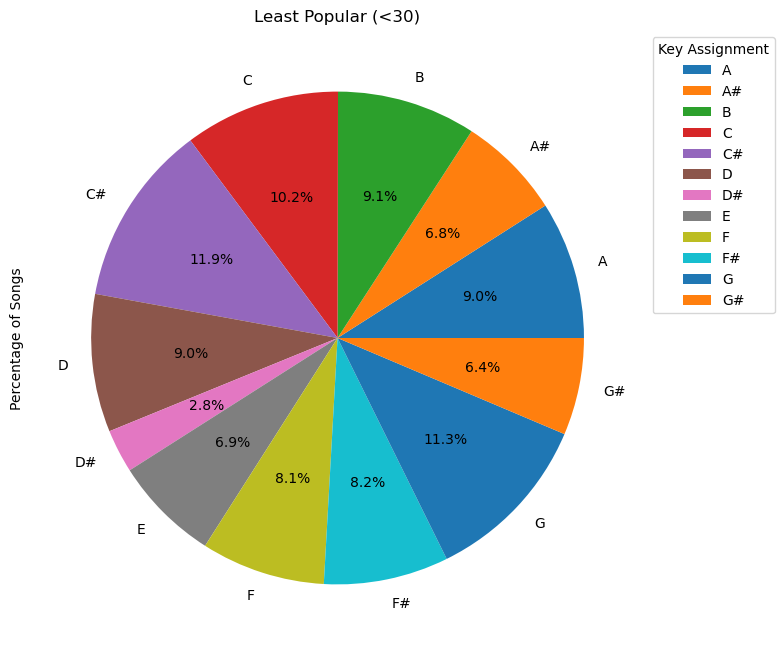

In [14]:
#Create bar graph with individual bin
pie_5= key_group_5
pie_5.plot(kind='pie', figsize=(10,8), title= 'Least Popular (<30)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

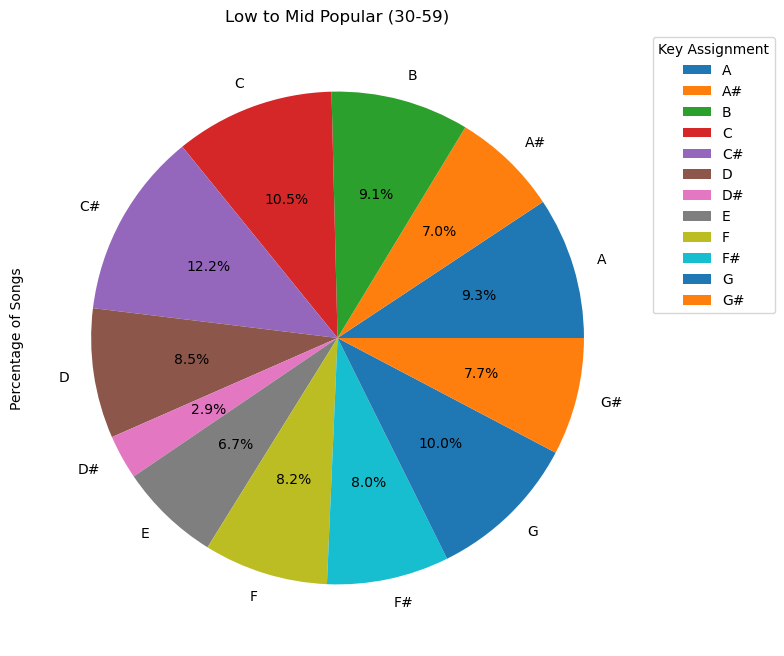

In [15]:
#Create bar graph with individual bin
pie_3= key_group_3
pie_3.plot(kind='pie', figsize=(10,8), title= 'Low to Mid Popular (30-59)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

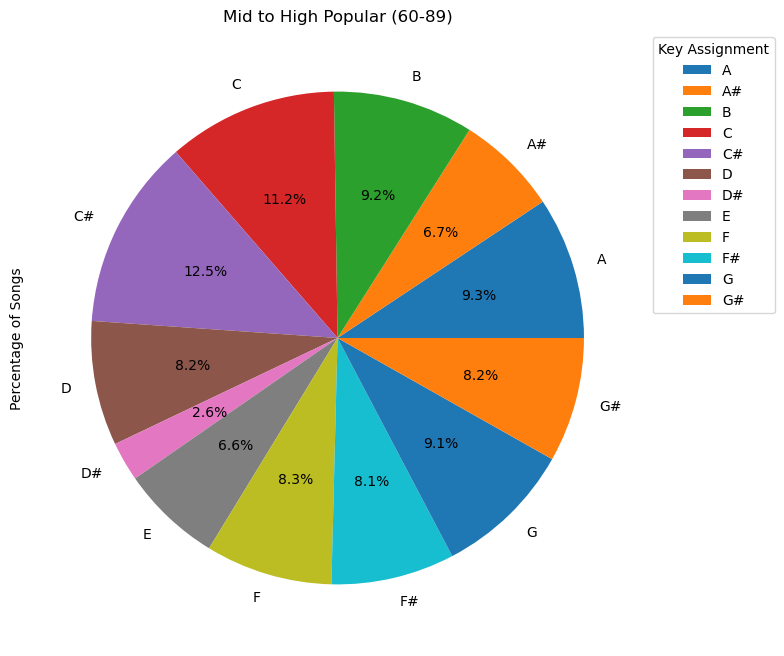

In [16]:
#Create bar graph with individual bin
pie_4= key_group_4
pie_4.plot(kind='pie', figsize=(10,8), title= 'Mid to High Popular (60-89)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

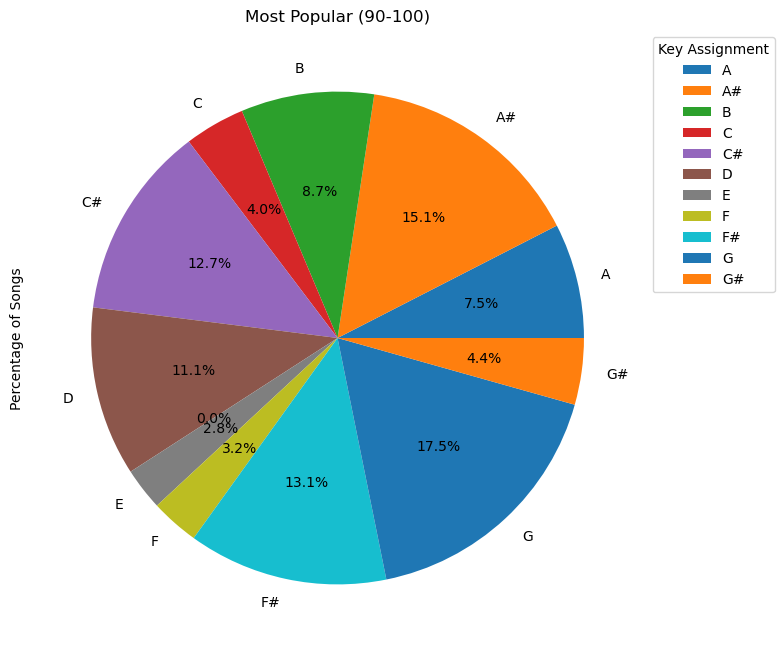

In [17]:
#Create bar graph with individual bin
pie_6= key_group_6
pie_6.plot(kind='pie', figsize=(10,8), title= 'Most Popular (90-100)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

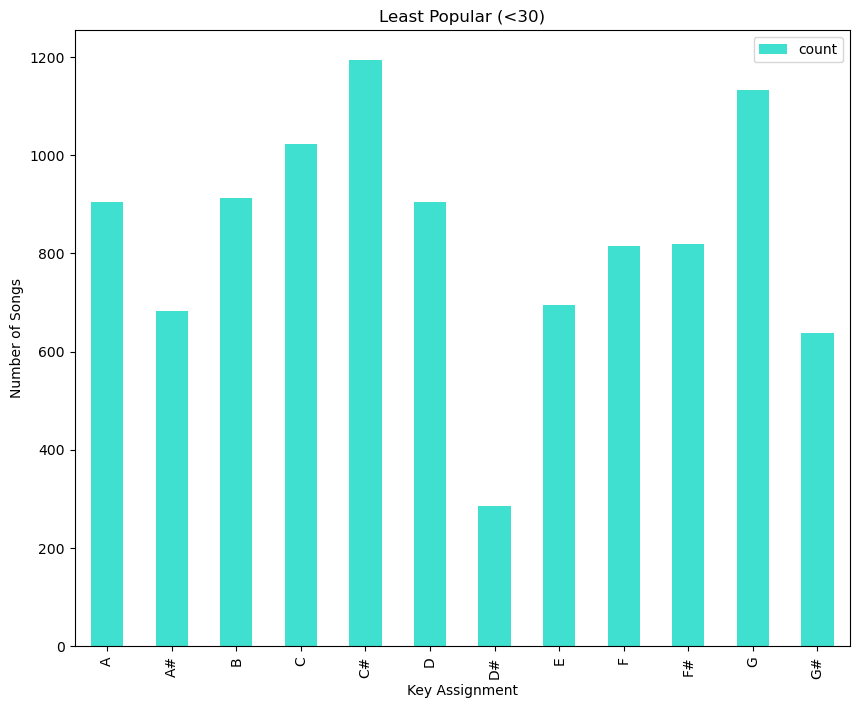

In [18]:
#Create bar graph with individual bin
bar_5= key_group_2.loc['Least Popular (<30)']
bar_5.plot(kind='bar', figsize=(10,8), title= 'Least Popular (<30)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='turquoise')
plt.show()

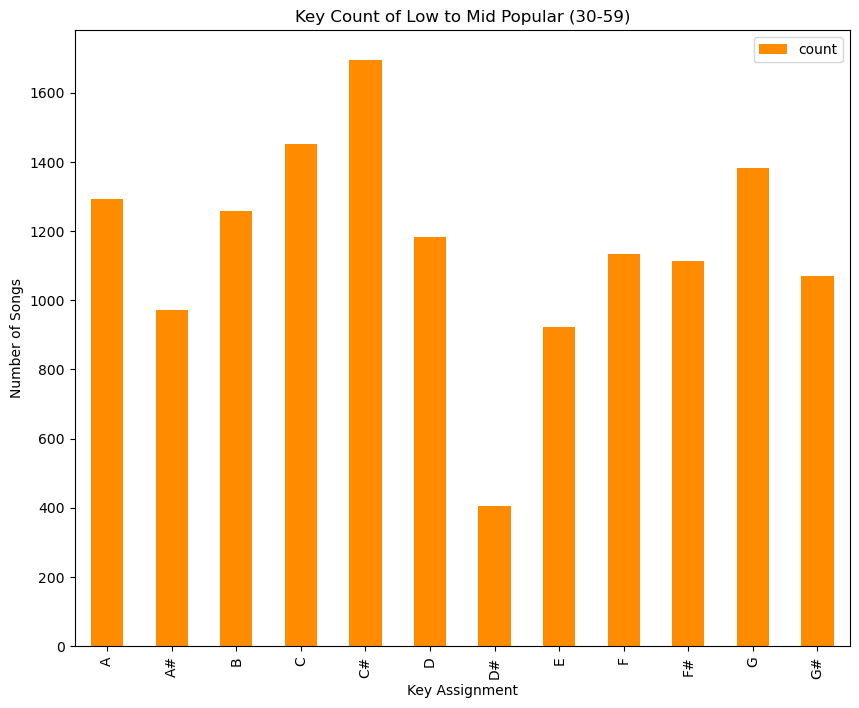

In [19]:
#Create bar graph with individual bin
bar_4= key_group_2.loc['Low to Mid Popular (30-59)']
bar_4.plot(kind='bar', figsize=(10,8), title= 'Key Count of Low to Mid Popular (30-59)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='darkorange')
plt.show()

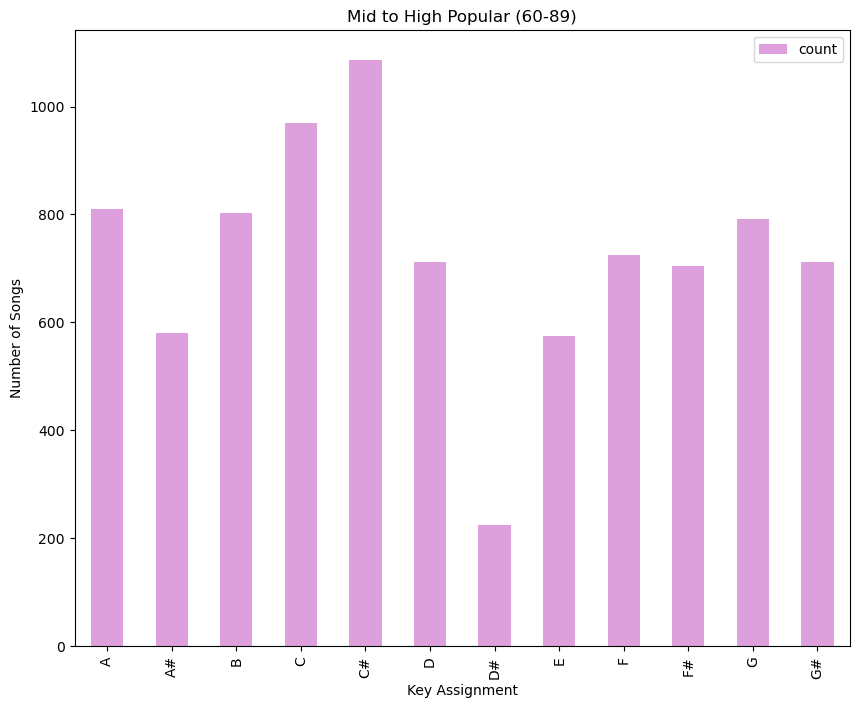

In [20]:
#Create bar graph with individual bin
bar_5= key_group_2.loc['Mid to High Popular (60-89)']
bar_5.plot(kind='bar', figsize=(10,8), title= 'Mid to High Popular (60-89)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='plum')
plt.show()

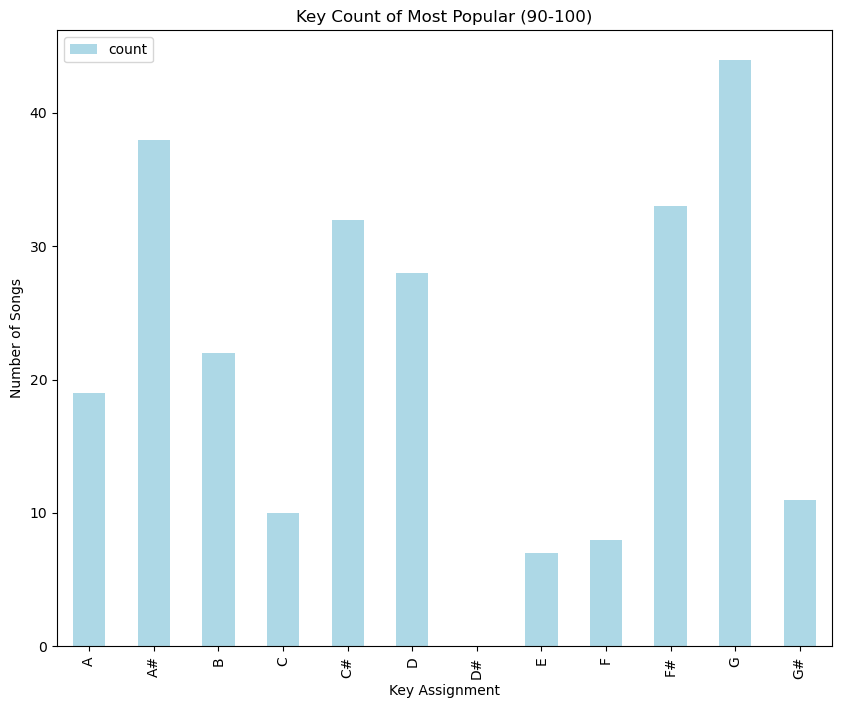

In [21]:
#Create bar graph with individual bin
bar_1= key_group_2.loc['Most Popular (90-100)']
bar_1.plot(kind='bar', figsize=(10,8), title= 'Key Count of Most Popular (90-100)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='lightblue')
plt.show()

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(spotify_df['Key'], spotify_df['Popularity'])

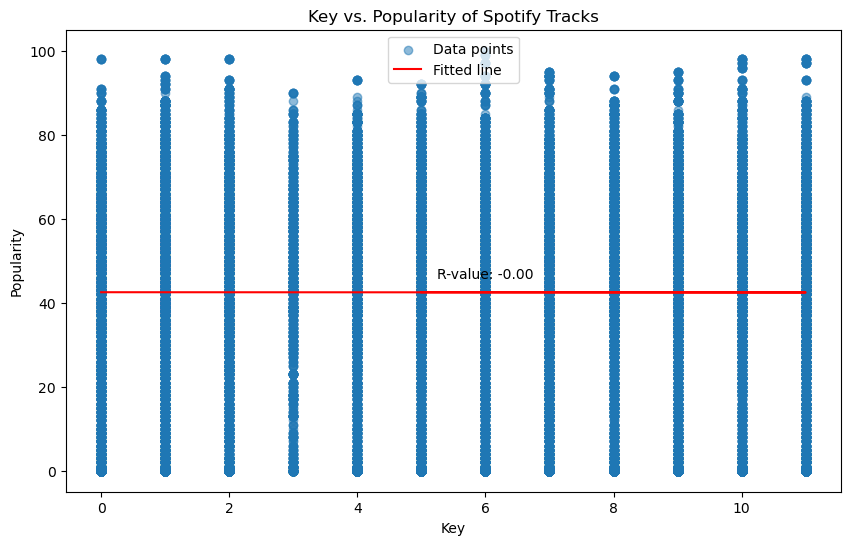

In [23]:
# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['Key'], spotify_df['Popularity'], alpha=0.5, label='Data points')
plt.plot(spotify_df['Key'], intercept + slope*spotify_df['Key'], 'r', label='Fitted line')
key_mid_point = np.median(spotify_df['Key'])
popularity_at_mid_point = intercept + slope * key_mid_point
plt.annotate(f'R-value: {r_value:.2f}', (key_mid_point, popularity_at_mid_point), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Key vs. Popularity of Spotify Tracks')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.legend()
plt.show()

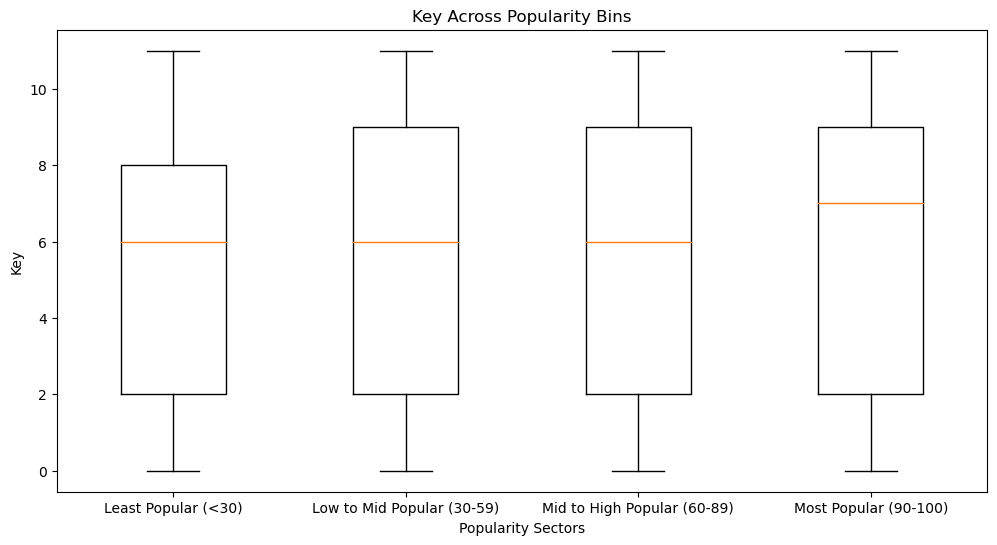

In [24]:
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)']

# Box plot for key across popularity bins
plt.figure(figsize=(12, 6))
plt.boxplot([spotify_df[spotify_df['Popularity Sectors'] == label]['Key'] for label in labels], labels=labels)
plt.title('Key Across Popularity Bins')
plt.ylabel('Key')
plt.xlabel('Popularity Sectors')
plt.show()

In [25]:
#------------------------------------------------------------------------#
#-------------------------------DURATION---------------------------------#
#------------------------------------------------------------------------#
# Copy dataframe for duration analysis 
spotify_duration_df = spotify_df.copy()

# Let's convert Duration(ms) to Duration(minutes)
spotify_duration_df['Duration (min)'] = round(spotify_duration_df['Duration (ms)'] / 60000,3)
spotify_duration_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms),Duration (min)
Track Name,,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400,3.040
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507,2.092
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547,2.376
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893,2.998
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333,2.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333,6.789
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987,5.783
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107,3.918


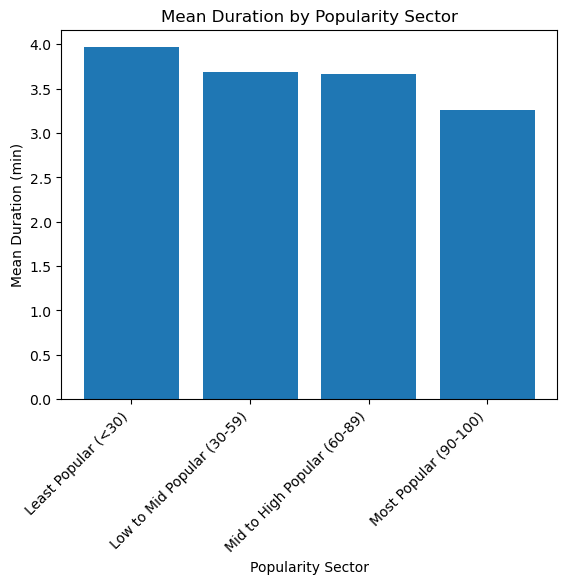

In [26]:
#------------------------------------------------------------------------#
#-------------------------------BAR CHART--------------------------------#
#------------------------------------------------------------------------#

#Group by popularity sector and calculate the mean duration for each sector
duration_by_popularity = spotify_duration_df.groupby('Popularity Sectors')['Duration (min)'].mean()

# Plot -> Mean Duration by Popularity Sector
plt.bar(duration_by_popularity.index, duration_by_popularity)
plt.title('Mean Duration by Popularity Sector')
plt.xlabel('Popularity Sector')
plt.ylabel('Mean Duration (min)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

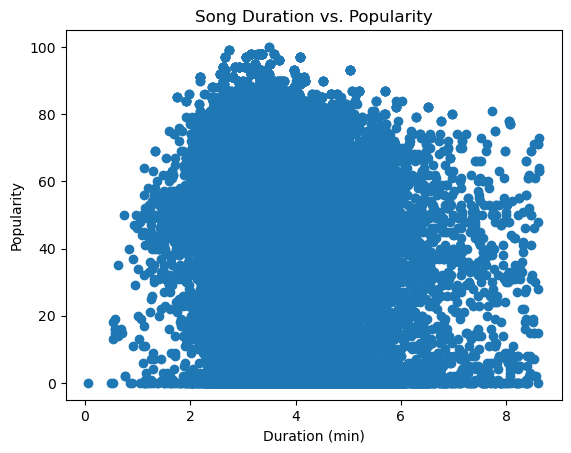

In [27]:
#------------------------------------------------------------------------#
#-----------------------------SCATTER PLOT-------------------------------#
#------------------------------------------------------------------------#

# Select relevant columns for the scatter plot
df_subset_duration = spotify_duration_df[['Popularity', 'Duration (min)','Popularity Sectors']]

# Plot a scatter plot
plt.scatter(df_subset_duration['Duration (min)'], df_subset_duration['Popularity'])
plt.title('Song Duration vs. Popularity')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()

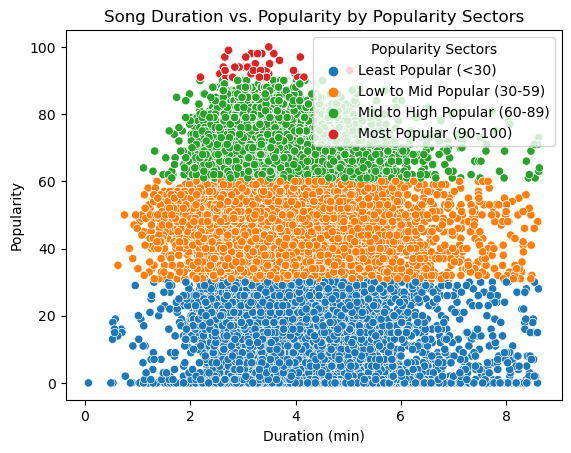

In [28]:
#---------------------Additional SCATTER PLOT-------------------------------#
import seaborn as sns
# Scatter plot with different colors for each popularity sector
sns.scatterplot(x='Duration (min)', y='Popularity', hue='Popularity Sectors', data=df_subset_duration)
plt.title('Song Duration vs. Popularity by Popularity Sectors')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()

The r-value is : -0.14368094806706228


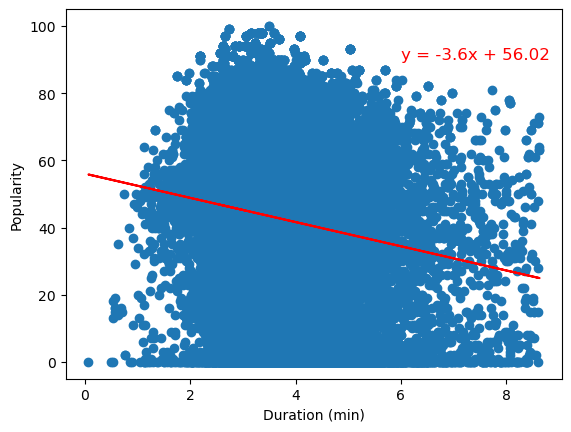

In [29]:
#------------------------------------------------------------------------#
#------------------------LINEAR REGRESSION PLOT--------------------------#
#------------------------------------------------------------------------#


def f_linear_reg_plot(x_value,y_value,x_label,y_label,x_s,y_s):

# Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Line to plot   
#     plt.figure(figsize=(10,6))
    plt.scatter(x_value, y_value)
    plt.plot(x_value,regress_values,"r-") # regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_s,y_s),fontsize=12,color="red") #regression line label
    
    # correlation
    print(f"The r-value is : {st.pearsonr(x_value, y_value)[0]}") 
    plt.show() # Show the plot
    
    
    
#Let's call the function above
#--------Popularity vs. Duration (min) Linear Regression Plot---------#
x_value = df_subset_duration['Duration (min)']
y_value = df_subset_duration['Popularity']
f_linear_reg_plot(x_value, y_value, "Duration (min)", "Popularity",6,90)

The r-value is : -0.14368094806706228


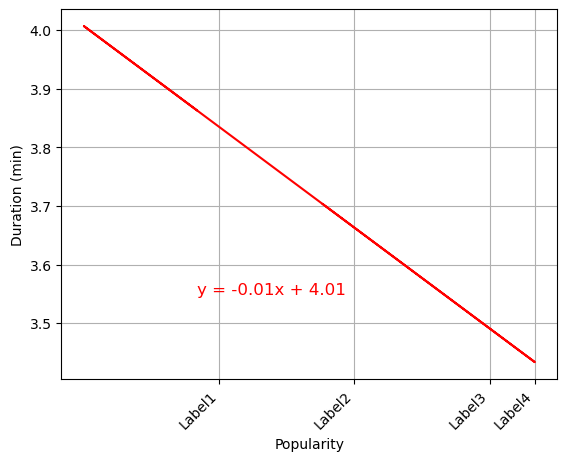

In [30]:
def f_linear_reg_plot2(x_value,y_value,x_label,y_label,x_s,y_s):

# Linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Line to plot   
    plt.plot(x_value,regress_values,"r-") # regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_s,y_s),fontsize=12,color="red") #regression line label
    plt.xticks([30, 60, 90, 100], ['Label1', 'Label2', 'Label3', 'Label4'], rotation=45, ha='right')
    plt.grid(True)

# correlation
    print(f"The r-value is : {st.pearsonr(x_value, y_value)[0]}") 
    #     r = st.pearsonr(x_value, y_value)
    #     print(f"The r-value is: {r[0]}")
    plt.show() # Show the plot

 
# Let's call the function above
#--------Popularity vs. Duration (min) Linear Regression Plot---------#    
y_value = df_subset_duration['Duration (min)']
x_value = df_subset_duration['Popularity']
f_linear_reg_plot2(x_value, y_value, "Popularity","Duration (min)",25,3.55)

In [31]:
#Loudness

# Assuming spotify_df is your DataFrame
popularity_sector_counts = spotify_df["Popularity"].value_counts()

# To sort the sectors by their bin order rather than the count, you can use sort_index() if your labels are sortable in a meaningful way
popularity_sector_counts_sorted = popularity_sector_counts.sort_index()

print(popularity_sector_counts_sorted)

Popularity
0      2703
1       575
2       387
3       321
4       240
       ... 
96        7
97       22
98       36
99        4
100       2
Name: count, Length: 101, dtype: int64


In [32]:
spotify_df.dtypes

Artist                  object
Popularity               int64
Popularity Sectors    category
Release Date             int64
Playlist Name           object
Genre                   object
Subgenre                object
Key                      int64
Key Assignment          object
Loudness               float64
Tempo                  float64
Duration (ms)            int64
dtype: object

In [33]:
loudness_median = spotify_df['Loudness'].median()
loudness_mean = spotify_df['Loudness'].mean()
loudness_std = spotify_df['Loudness'].std()
loudness_min = spotify_df['Loudness'].min()
loudness_max = spotify_df['Loudness'].max()
loudness_q1 = spotify_df['Loudness'].quantile(0.25)
loudness_q3 = spotify_df['Loudness'].quantile(0.75)

print(f"Loudness Median: {loudness_median}")
print(f"Loudness Mean: {loudness_mean}")
print(f"Loudness Standard Deviation: {loudness_std}")
print(f"Loudness Minimum: {loudness_min}")
print(f"Loudness Maximum: {loudness_max}")
print(f"Loudness 1st Quartile (Q1): {loudness_q1}")
print(f"Loudness 3rd Quartile (Q3): {loudness_q3}")

Loudness Median: -6.166
Loudness Mean: -6.719499131970883
Loudness Standard Deviation: 2.988436386332397
Loudness Minimum: -46.448
Loudness Maximum: 1.275
Loudness 1st Quartile (Q1): -8.171
Loudness 3rd Quartile (Q3): -4.645


In [34]:
loudness_stats = spotify_df.groupby('Popularity Sectors')['Loudness'].agg(['median', 'mean', 'std', 'min', 'max', 'count'])
loudness_stats

,median,mean,std,min,max,count
Popularity Sectors,,,,,,
Least Popular (<30),-6.2975,-6.838589,3.032534,-34.283,1.135,10008
Low to Mid Popular (30-59),-6.3230,-6.898451,3.122467,-46.448,1.275,13883
Mid to High Popular (60-89),-5.8070,-6.306411,2.679589,-28.309,0.302,8690
Most Popular (90-100),-5.9800,-6.376270,2.321635,-14.454,-3.280,252


In [35]:
# linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(spotify_df['Loudness'], spotify_df['Popularity'])

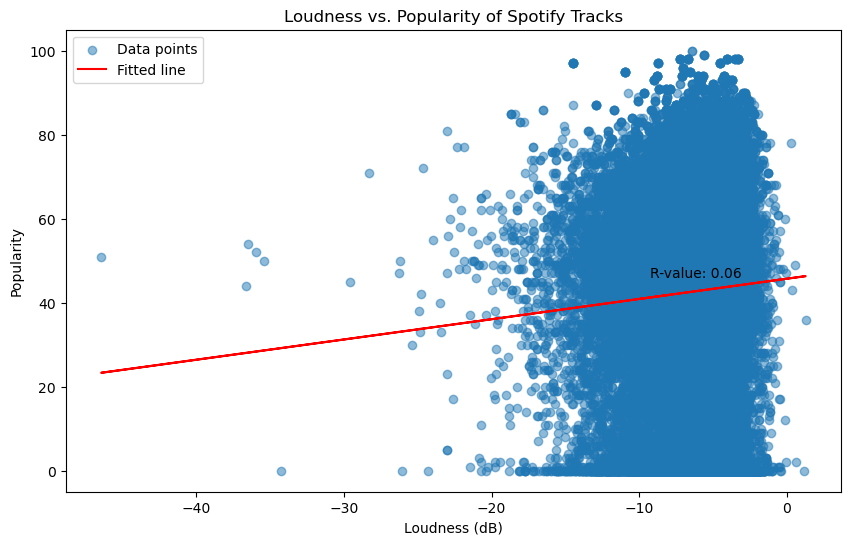

In [36]:
# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['Loudness'], spotify_df['Popularity'], alpha=0.5, label='Data points')
plt.plot(spotify_df['Loudness'], intercept + slope*spotify_df['Loudness'], 'r', label='Fitted line')
loudness_mid_point = np.median(spotify_df['Loudness'])
popularity_at_mid_point = intercept + slope * loudness_mid_point
plt.annotate(f'R-value: {r_value:.2f}', (loudness_mid_point, popularity_at_mid_point), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Loudness vs. Popularity of Spotify Tracks')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.legend()
plt.show()

In [37]:
print(f'Correlation Coefficient (r value): {r_value:.2f}')

Correlation Coefficient (r value): 0.06


In [38]:
print(f'Regression Formula: Popularity = {intercept:.2f} + ({slope:.2f}) * Loudness')

Regression Formula: Popularity = 45.72 + (0.48) * Loudness


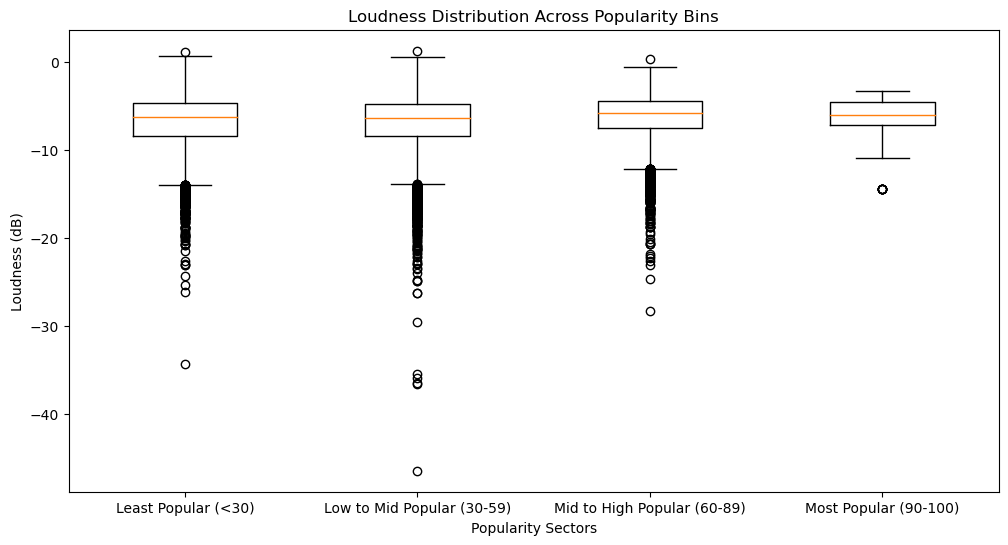

In [39]:
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)']

# Box plot for loudness across popularity bins
plt.figure(figsize=(12, 6))
plt.boxplot([spotify_df[spotify_df['Popularity Sectors'] == label]['Loudness'] for label in labels], labels=labels)
plt.title('Loudness Distribution Across Popularity Bins')
plt.ylabel('Loudness (dB)')
plt.xlabel('Popularity Sectors')
plt.show()

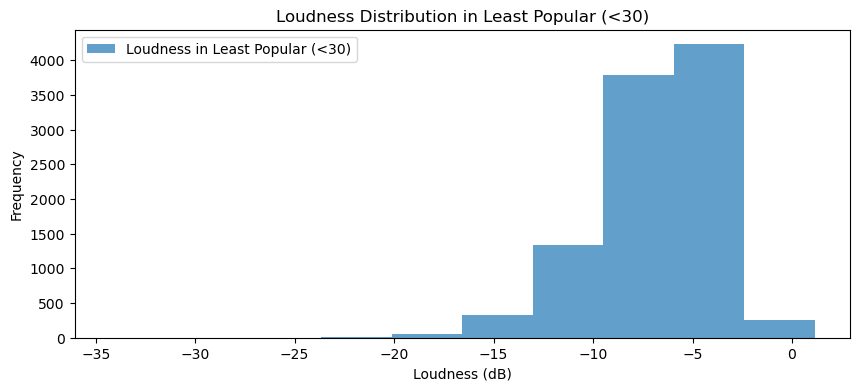

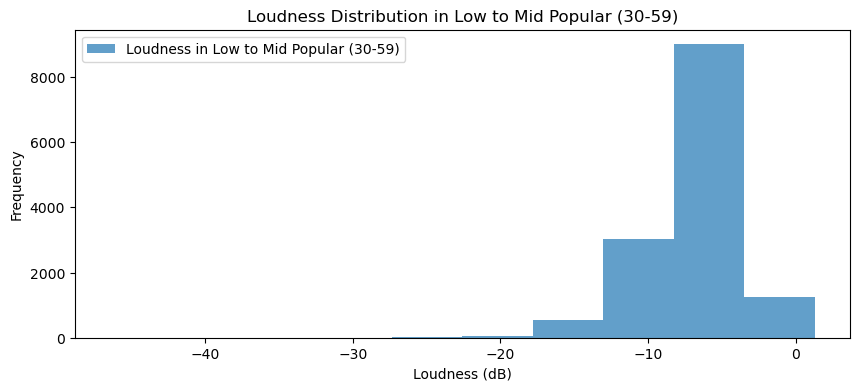

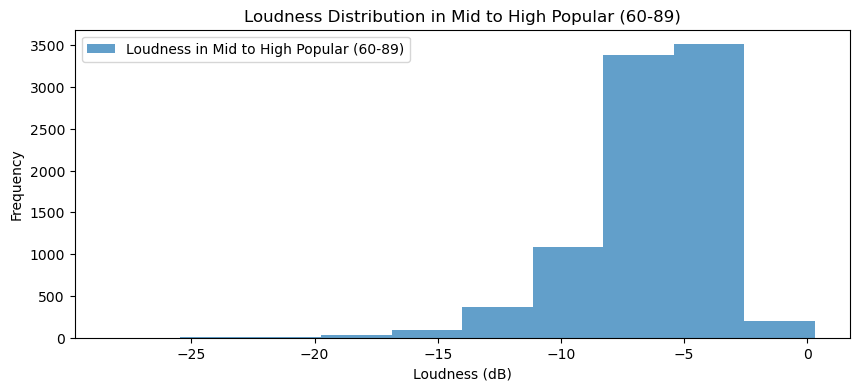

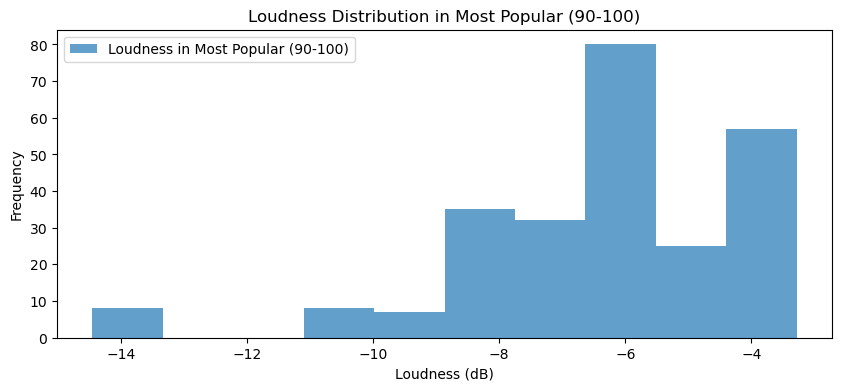

In [40]:
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)']

# Histograms for loudness in each popularity bin
for label in labels:
    subset = spotify_df[spotify_df['Popularity Sectors'] == label]
    plt.figure(figsize=(10, 4))
    plt.hist(subset['Loudness'], bins=10, alpha=0.7, label=f'Loudness in {label}')
    plt.title(f'Loudness Distribution in {label}')
    plt.xlabel('Loudness (dB)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [41]:
#Genre

spotify_data_genre = spotify_df.copy(deep=True)  # deep  changes made to original dont impact copy - true is default
spotify_data_genre.head()

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333


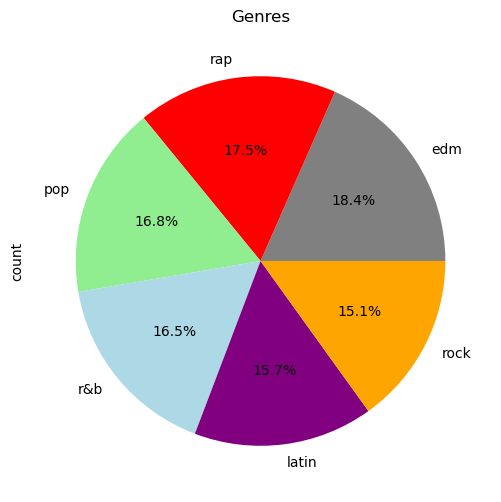

In [42]:
#Pie chart playlist distro by Genre
custom_colors = ['grey', 'red', 'lightgreen', 'lightblue', 'purple','orange',]
paper = plt.figure(figsize=[10,6])
spotify_data_genre['Genre'].value_counts().plot.pie(autopct='%3.1f%%',colors=custom_colors)
plt.title('Genres')
plt.show()

In [43]:
#Categorize and Establish Bins for Eras
era_bins = (0, 1969, 1979, 1989, 1999, 2019, 2029)
labels = [1960, 1970, 1980, 1990, 2000, 2010] 

spotify_data_genre["Eras"] = pd.cut(spotify_data_genre["Release Date"],era_bins, labels=labels)


spotify_data_genre.head()

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms),Eras
Track Name,,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400,1960
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507,1960
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547,1960
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893,1960
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333,1960


In [44]:
spotify_data_genre.Genre.value_counts()

Genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [45]:
genrelist = spotify_data_genre['Genre'].unique().tolist()
genrelist

['r&b', 'rock', 'rap', 'pop', 'latin', 'edm']

In [46]:
spotify_data_genre.Eras.value_counts()

Eras
2000    27291
1990     2310
1980     1306
1970      966
2010      785
1960      175
Name: count, dtype: int64

In [47]:
genreYear_avg_popularity = pd.DataFrame(spotify_data_genre.groupby(["Genre", "Release Date"])["Popularity"].mean()).reset_index()
#genre_avg_popularity.info()


genreYear_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Release Date"]>2010]
genreYear_avg_popularity.head()

,Genre,Release Date,Popularity
26,edm,2011,32.797297
27,edm,2012,35.323529
28,edm,2013,19.782748
29,edm,2014,20.804965
30,edm,2015,26.432900


In [48]:
#Prep Average Popularity by Genre by Time

edm_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Genre"]=="edm"]
latin_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Genre"]=="latin"]
pop_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Genre"]=="pop"]
rb_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Genre"]=="r&b"]
rap_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Genre"]=="rap"]
rock_avg_popularity = genreYear_avg_popularity[genreYear_avg_popularity["Genre"]=="rock"]

rap_avg_popularity

,Genre,Release Date,Popularity
231,rap,2011,31.537500
232,rap,2012,31.247863
233,rap,2013,24.688172
234,rap,2014,30.874286
235,rap,2015,40.097872
236,rap,2016,40.457627
237,rap,2017,37.749460
238,rap,2018,43.475177
239,rap,2019,53.817982
240,rap,2020,50.635220


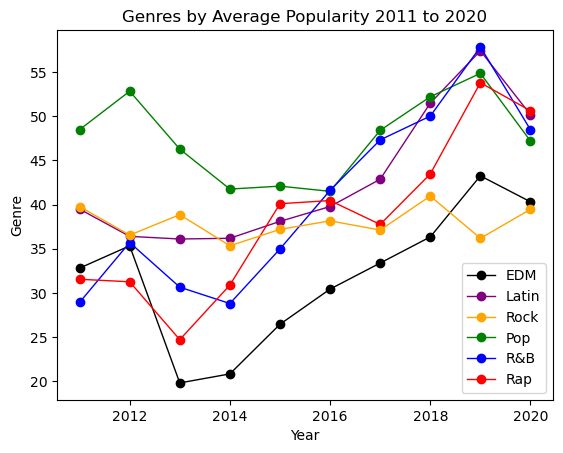

In [49]:
#Plot line chart of Genres by Popularity for 2011 to 2020
x_axis = rock_avg_popularity["Release Date"]

edm, = plt.plot(x_axis, edm_avg_popularity["Popularity"], marker="o", color="Black", linewidth=1, label="EDM")
latin, = plt.plot(x_axis, latin_avg_popularity["Popularity"], marker="o", color="Purple", linewidth=1, label="Latin")
pop, = plt.plot(x_axis, pop_avg_popularity["Popularity"], marker="o", color="Green", linewidth=1, label="Pop")
rb, = plt.plot(x_axis, rb_avg_popularity["Popularity"], marker="o", color="Blue", linewidth=1, label="R&B")
rap, = plt.plot(x_axis, rap_avg_popularity["Popularity"], marker="o", color="Red", linewidth=1, label="Rap")
rock, = plt.plot(x_axis, rock_avg_popularity["Popularity"], marker="o", color="Orange", linewidth=1, label="Rock")

plt.legend(handles=[edm, latin, rock, pop, rb, rap], loc="best")
#plt.figure(figsize=(8,6))
plt.title("Genres by Average Popularity 2011 to 2020")
plt.xlabel("Year")
plt.ylabel("Genre")
#plt.figure().set_figwidth(20)
#plt.rcParams['figure.figsize'] = [8,5]
plt.savefig("New Genres by Average Popularity 2011 to 2020")
plt.show()

In [50]:
genre_avg_popularity = pd.DataFrame(spotify_data_genre.groupby(["Genre"])["Popularity"].mean()).reset_index()
genre_avg_popularity

,Genre,Popularity
0,edm,34.833526
1,latin,47.026576
2,pop,47.744870
3,r&b,41.223532
4,rap,43.215454
5,rock,41.728338


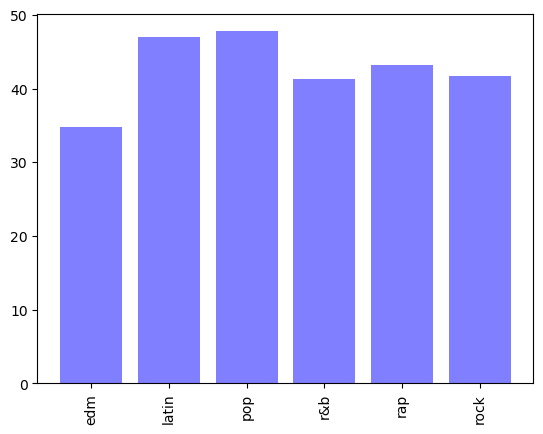

In [51]:
#Plot Average Popularity by Genres


x_axis = np.arange(len(genre_avg_popularity["Genre"]))

plt.bar(x_axis, genre_avg_popularity["Popularity"], color="b", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,genre_avg_popularity["Genre"], rotation="vertical")
plt.show()

In [52]:
genreEra_avg_popularity = pd.DataFrame(spotify_data_genre.groupby(["Genre","Eras"])["Popularity"].mean()).reset_index()
genreEra_avg_popularity= genreEra_avg_popularity.dropna()
genreEra_avg_popularity.head()

,Genre,Eras,Popularity
1,edm,1970,24.000000
2,edm,1980,37.400000
3,edm,1990,39.300000
4,edm,2000,34.658390
5,edm,2010,40.315217


In [53]:
era_list = genreEra_avg_popularity['Eras'].unique().tolist()
era_list

[1970, 1980, 1990, 2000, 2010, 1960]

In [54]:
era = 1970
era_df = genreEra_avg_popularity[genreEra_avg_popularity["Eras"]==era].sort_values(["Eras"])
era_df

#sort_values(['Popularity'], ascending=False)

,Genre,Eras,Popularity
1,edm,1970,24.000000
7,latin,1970,63.250000
13,pop,1970,60.277778
19,r&b,1970,47.032787
25,rap,1970,39.333333
31,rock,1970,46.462069


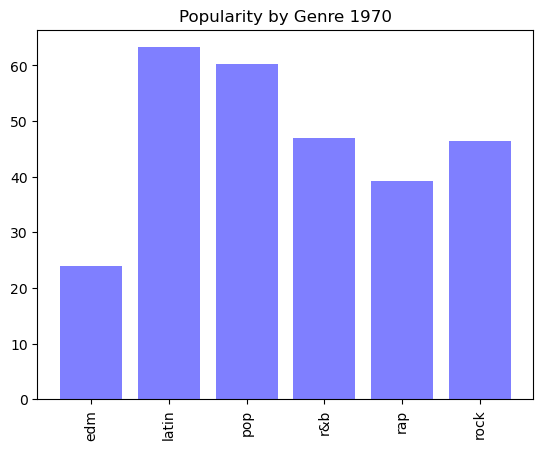

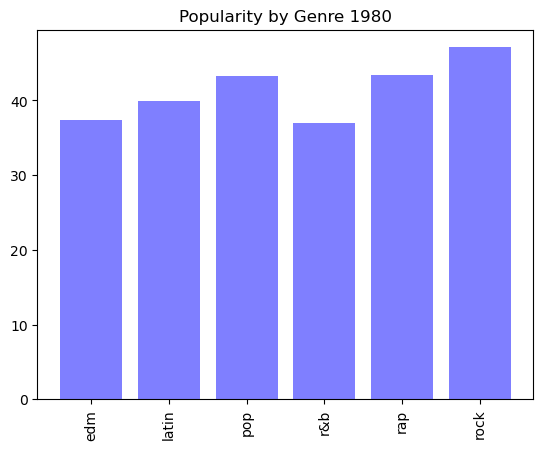

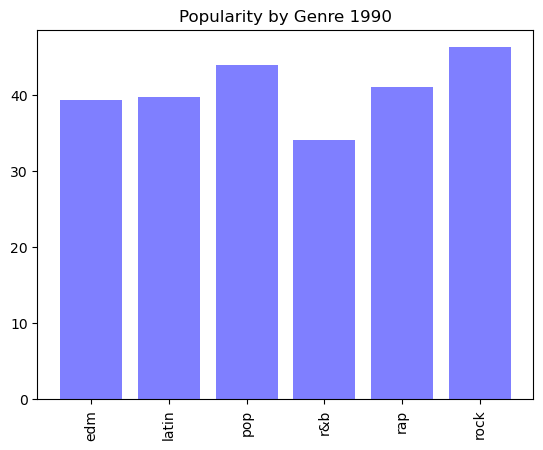

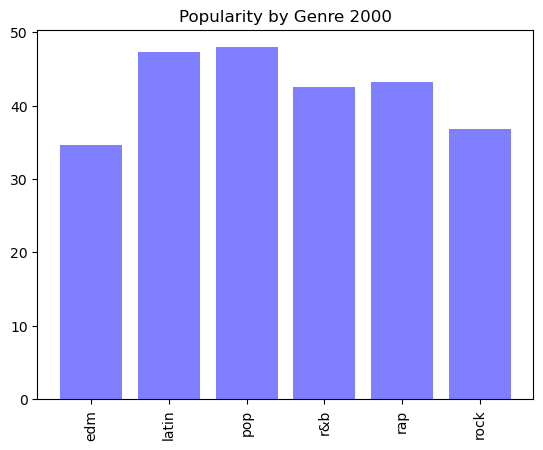

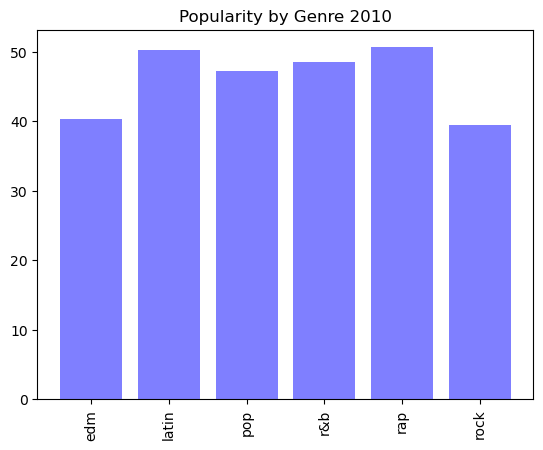

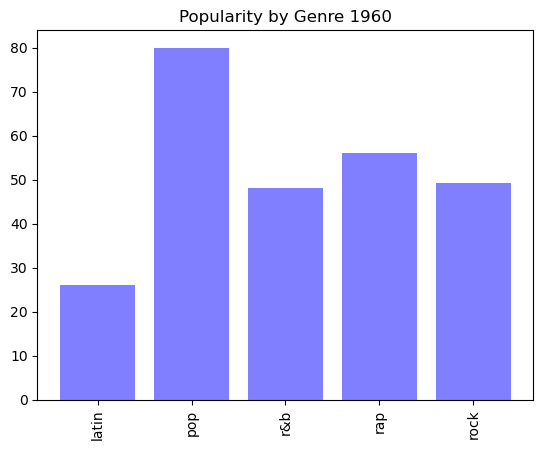

In [55]:
#Plot Average Popularity by Genres
for era in era_list:
    era_df = genreEra_avg_popularity[genreEra_avg_popularity["Eras"]==era]


    x_axis = np.arange(len(era_df["Genre"]))

    plt.bar(x_axis, era_df["Popularity"], color="b", alpha=0.5, align="center")
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations,era_df["Genre"], rotation="vertical")
    plt.title("Popularity by Genre " + str(era))
    plt.savefig("Popularity by Genre "+ str(era))
    plt.show()
    

In [56]:
artist_df = pd.DataFrame(spotify_df.groupby(['Artist'])['Popularity'].mean()).sort_values(['Popularity'], ascending=False).reset_index()

artist_df.head()

,Artist,Popularity
0,Trevor Daniel,97.000000
1,Y2K,91.000000
2,Don Toliver,90.714286
3,Roddy Ricch,88.210526
4,DaBaby,87.857143


In [57]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, At Last - Single Version to Tainted Love
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Artist              32828 non-null  object  
 1   Popularity          32833 non-null  int64   
 2   Popularity Sectors  32833 non-null  category
 3   Release Date        32833 non-null  int64   
 4   Playlist Name       32833 non-null  object  
 5   Genre               32833 non-null  object  
 6   Subgenre            32833 non-null  object  
 7   Key                 32833 non-null  int64   
 8   Key Assignment      32833 non-null  object  
 9   Loudness            32833 non-null  float64 
 10  Tempo               32833 non-null  float64 
 11  Duration (ms)       32833 non-null  int64   
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 4.0+ MB


In [58]:
#song_df = pd.DataFrame(spotify_df.groupby(['Track Name'])['Popularity'].mean()).sort_values(['Popularity'], ascending=False).reset_index()

#song_df.head()

In [59]:
#song_df = pd.DataFrame(spotify_df.groupby(['Playlist Name'])['Popularity'].mean()).sort_values(['Popularity'], ascending=False).reset_index()

#song_df.head()

In [60]:
songArtist_df = pd.DataFrame(spotify_df.groupby(['Track Name', 'Artist'])['Popularity'].mean()).sort_values(['Popularity'], ascending=False).reset_index()

songArtist_df.head(10)

,Track Name,Artist,Popularity
0,The Box,Roddy Ricch,98.0
1,Blinding Lights,The Weeknd,98.0
2,Tusa,KAROL G,98.0
3,Memories,Maroon 5,98.0
4,Don't Start Now,Dua Lipa,97.0
5,Falling,Trevor Daniel,97.0
6,everything i wanted,Billie Eilish,97.0
7,RITMO (Bad Boys For Life),The Black Eyed Peas,96.0
8,Yummy,Justin Bieber,95.0
9,bad guy,Billie Eilish,95.0


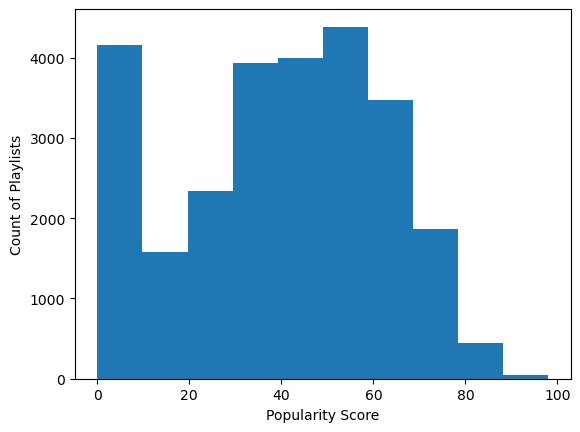

NormaltestResult(statistic=1.173046825479303, pvalue=0.5562578057786505)
The mean popularity of playlists is 39.37019779744531
The median popularity of playlists is 42.0
The popularity of playlists is ModeResult(mode=0.0, count=2264)
 
The population variance using the NumPy module is 515.5042952469508
The population standard deviation using the NumPy module is 22.70471966897964
 
Roughly 68% of the data is between 16.665 and 62.075
Roughly 95% of the data is between -6.039 and 84.78
Roughly 99.7% of the data is between -28.744 and 107.484
 


In [61]:
import scipy.stats as st
popularity = songArtist_df['Popularity']
plt.hist(popularity)
plt.xlabel('Popularity Score')
plt.ylabel('Count of Playlists')
plt.show()
print(st.normaltest(popularity.sample(50)))


mean_numpy = np.mean(popularity)
print(f"The mean popularity of playlists is {mean_numpy}")

median_numpy = np.median(popularity)
print(f"The median popularity of playlists is {median_numpy}")

mode_scipy = st.mode(popularity)
print(f"The popularity of playlists is {mode_scipy}")
print(' ')

var_numpy = np.var(popularity,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(popularity,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")
print(' ')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")
print(' ')

In [62]:
z_scipy = st.zscore(popularity)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0        2.582274
1        2.582274
2        2.582274
3        2.582274
4        2.538230
           ...   
26224   -1.734009
26225   -1.734009
26226   -1.734009
26227   -1.734009
26228   -1.734009
Name: Popularity, Length: 26229, dtype: float64


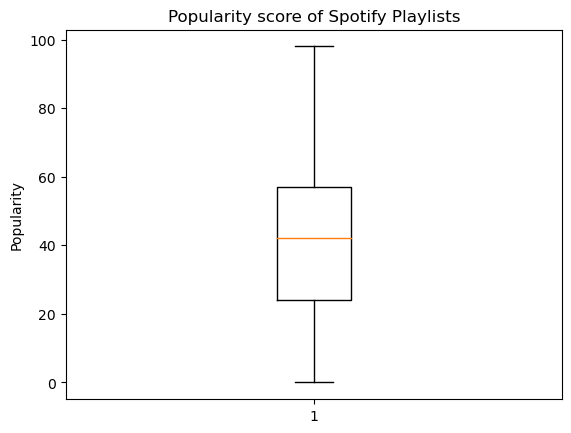

In [63]:
fig1, ax1 = plt.subplots()
ax1.set_title('Popularity score of Spotify Playlists')
ax1.set_ylabel('Popularity')
ax1.boxplot(popularity)
plt.show()

In [64]:
quartiles = popularity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of popularity is: {lowerq}")
print(f"The upper quartile of popularity is: {upperq}")
print(f"The interquartile range of popularity is: {iqr}")
print(f"The the median of popularity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of popularity is: 24.0
The upper quartile of popularity is: 57.0
The interquartile range of popularity is: 33.0
The the median of popularity is: 42.0 
Values below -25.5 could be outliers.
Values above 106.5 could be outliers.


In [65]:
#Tempo--------------------

summary_statistic = spotify_df['Tempo'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistic

mean      120.881132
median    121.984000
var       723.804994
std        26.903624
sem         0.148476
Name: Tempo, dtype: float64

In [66]:
def plt_lin_reg(x_values, y_values, x_label, y_label, title, coordinates):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, edgecolors = 'black', alpha = 0.75)
    
    plt.plot(x_values, regression_line, color = 'r', label = 0.75)
    
    equation = f'y = {round(slope, 2)}x + {round(intercept,  2)}'
    
    plt.annotate(equation, coordinates, xycoords = 'axes fraction', color = 'r', fontsize = 12)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    print(f'The r-value is: {round(r_value, 2)}')

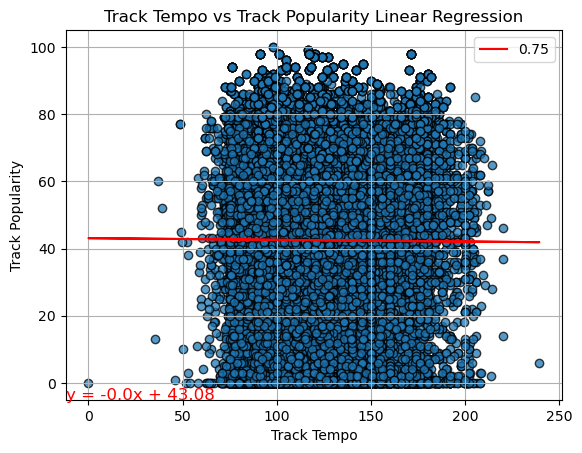

The r-value is: -0.01


In [67]:
plt_lin_reg(spotify_df['Tempo'], spotify_df['Popularity'], 
            'Track Tempo', 'Track Popularity', 
            'Track Tempo vs Track Popularity Linear Regression', (0,0))

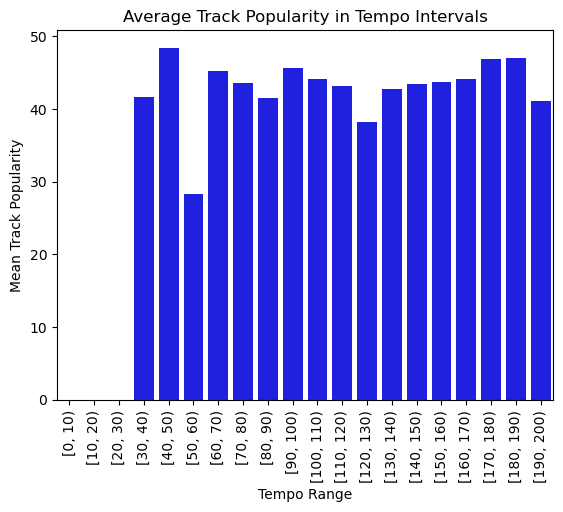

In [68]:
bins = pd.cut(spotify_df['Tempo'], bins=range(0, 205, 10), right=False)
Tempo_Pop = spotify_df.groupby(bins)['Popularity'].mean().reset_index()

# Rename columns
Tempo_Pop.columns = ['tempo_range', 'mean_track_popularity']

# Filter out empty bins
Tempo_Pop = Tempo_Pop.dropna(subset=['mean_track_popularity'])

# Plot the binned data
sns.barplot(x='tempo_range', y='mean_track_popularity', data=Tempo_Pop, color='blue')
plt.title('Average Track Popularity in Tempo Intervals')
plt.xlabel('Tempo Range')
plt.ylabel('Mean Track Popularity')
plt.xticks(rotation=90)
plt.show()

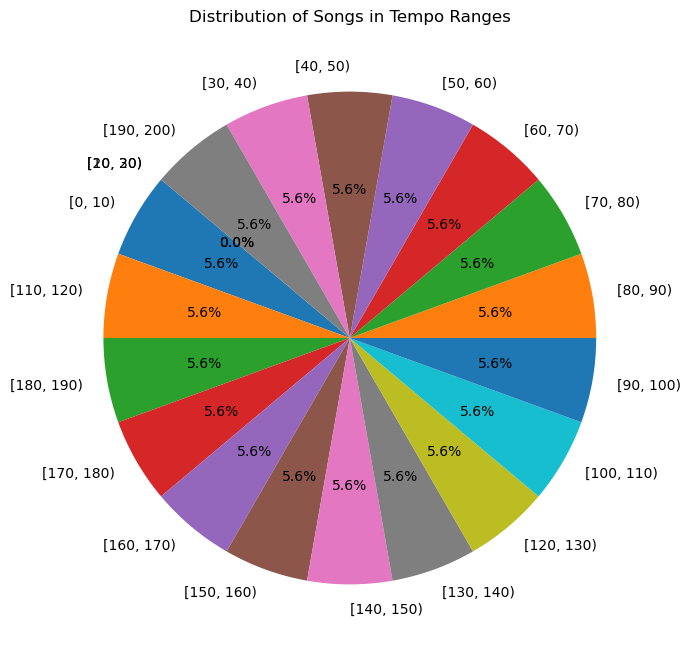

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(Tempo_Pop['tempo_range'].value_counts(), labels=Tempo_Pop['tempo_range'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs in Tempo Ranges')

plt.show()